In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("Churn_Prediction.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [4]:
## Drop The Customer ID Columns because it is not helpful for our model

df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.dtypes
df1.copy()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


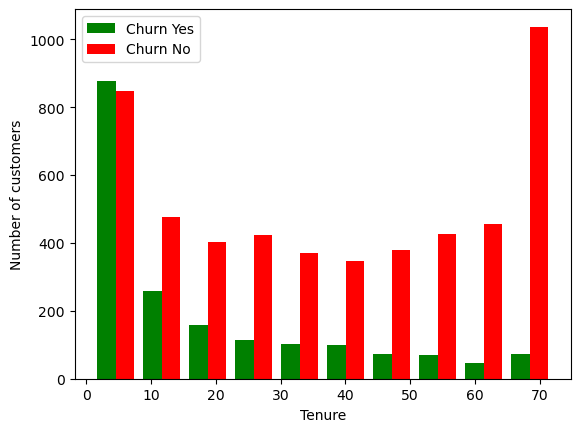

In [15]:
tenur_churn_no=df1[df1.Churn=="No"].tenure
tenur_churn_yes=df1[df1.Churn=="Yes"].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.legend("Customer Churn Prediction Vizualisation")
plt.hist([tenur_churn_yes,tenur_churn_no],color=['green','red'],label=['Churn Yes','Churn No'])
plt.legend()

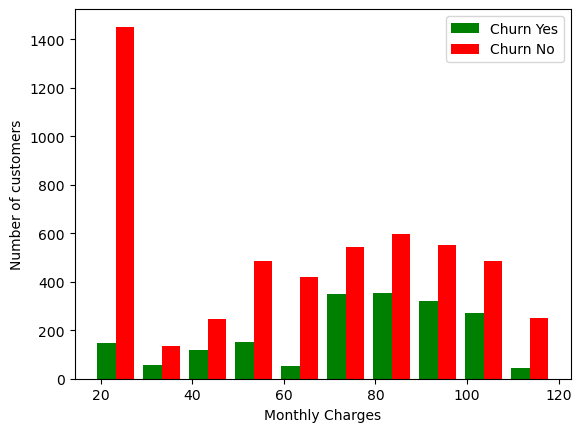

In [16]:
monthly_churn_no=df1[df1.Churn=="No"].MonthlyCharges
monthly_churn_yes=df1[df1.Churn=="Yes"].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.legend("Customer Churn Prediction Vizualisation")
plt.hist([monthly_churn_yes,monthly_churn_no],color=['green','red'],label=['Churn Yes','Churn No'])
plt.legend()

In [17]:
def print_unique_value(df):
    for columns in df: 
        if df[columns].dtypes=="object":
            print(f'Column : {columns} Values : {df[columns].unique()}')

print_unique_value(df1)

Column : gender Values : ['Female' 'Male']
Column : Partner Values : ['Yes' 'No']
Column : Dependents Values : ['No' 'Yes']
Column : PhoneService Values : ['No' 'Yes']
Column : MultipleLines Values : ['No phone service' 'No' 'Yes']
Column : InternetService Values : ['DSL' 'Fiber optic' 'No']
Column : OnlineSecurity Values : ['No' 'Yes' 'No internet service']
Column : OnlineBackup Values : ['Yes' 'No' 'No internet service']
Column : DeviceProtection Values : ['No' 'Yes' 'No internet service']
Column : TechSupport Values : ['No' 'Yes' 'No internet service']
Column : StreamingTV Values : ['No' 'Yes' 'No internet service']
Column : StreamingMovies Values : ['No' 'Yes' 'No internet service']
Column : Contract Values : ['Month-to-month' 'One year' 'Two year']
Column : PaperlessBilling Values : ['Yes' 'No']
Column : PaymentMethod Values : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Column : TotalCharges Values : ['29.85' '1889.5' '108.15' ... '34

In [18]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

C:\Users\Ordinateur\AppData\Local\Temp\ipykernel_33976\3221983738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)
C:\Users\Ordinateur\AppData\Local\Temp\ipykernel_33976\3221983738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [20]:
print_unique_value(df1)

Column : gender Values : ['Female' 'Male']
Column : Partner Values : ['Yes' 'No']
Column : Dependents Values : ['No' 'Yes']
Column : PhoneService Values : ['No' 'Yes']
Column : MultipleLines Values : ['No' 'Yes']
Column : InternetService Values : ['DSL' 'Fiber optic' 'No']
Column : OnlineSecurity Values : ['No' 'Yes']
Column : OnlineBackup Values : ['Yes' 'No']
Column : DeviceProtection Values : ['No' 'Yes']
Column : TechSupport Values : ['No' 'Yes']
Column : StreamingTV Values : ['No' 'Yes']
Column : StreamingMovies Values : ['No' 'Yes']
Column : Contract Values : ['Month-to-month' 'One year' 'Two year']
Column : PaperlessBilling Values : ['Yes' 'No']
Column : PaymentMethod Values : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Column : TotalCharges Values : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Column : Churn Values : ['No' 'Yes']


In [21]:
yes_no=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

for cols in yes_no:
    df1[cols].replace({"Yes":1,"No":0},inplace=True)

C:\Users\Ordinateur\AppData\Local\Temp\ipykernel_33976\2230442847.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[cols].replace({"Yes":1,"No":0},inplace=True)
C:\Users\Ordinateur\AppData\Local\Temp\ipykernel_33976\2230442847.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[cols].repla

In [22]:
print_unique_value(df1)

Column : gender Values : ['Female' 'Male']
Column : InternetService Values : ['DSL' 'Fiber optic' 'No']
Column : Contract Values : ['Month-to-month' 'One year' 'Two year']
Column : PaymentMethod Values : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Column : TotalCharges Values : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [24]:
for cols in df1:
    print(f'Colonne {cols} Values: {df1[cols].unique()}')

Colonne gender Values: ['Female' 'Male']
Colonne SeniorCitizen Values: [0 1]
Colonne Partner Values: [1 0]
Colonne Dependents Values: [0 1]
Colonne tenure Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Colonne PhoneService Values: [0 1]
Colonne MultipleLines Values: [0 1]
Colonne InternetService Values: ['DSL' 'Fiber optic' 'No']
Colonne OnlineSecurity Values: [0 1]
Colonne OnlineBackup Values: [1 0]
Colonne DeviceProtection Values: [0 1]
Colonne TechSupport Values: [0 1]
Colonne StreamingTV Values: [0 1]
Colonne StreamingMovies Values: [0 1]
Colonne Contract Values: ['Month-to-month' 'One year' 'Two year']
Colonne PaperlessBilling Values: [1 0]
Colonne PaymentMethod Values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Colonne MonthlyCharges Values: [29.85 56.95 

In [28]:
df1["gender"].replace({"Female":1,"Male":0},inplace=True)
df1.head()

C:\Users\Ordinateur\AppData\Local\Temp\ipykernel_33976\2205326763.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["gender"].replace({"Female":1,"Male":0},inplace=True)
C:\Users\Ordinateur\AppData\Local\Temp\ipykernel_33976\2205326763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gender"].replace({"Female":1,"Male":0},inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [35]:
df2=pd.get_dummies(data=df1,columns=["InternetService","Contract","PaymentMethod"])
df2[df2.select_dtypes(bool).columns] = df2.select_dtypes(bool).astype(int)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [37]:
df2.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7032, dtype: object

In [39]:
df2["TotalCharges"] = pd.to_numeric(df2["TotalCharges"], errors="coerce")
df2["TotalCharges"].fillna(0, inplace=True)


C:\Users\Ordinateur\AppData\Local\Temp\ipykernel_33976\1225619265.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["TotalCharges"].fillna(0, inplace=True)


In [46]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [47]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [48]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3249,1,0,1,1,0.126761,1,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
6581,1,1,0,0,0.746479,1,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1504,1,0,0,0,0.239437,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [55]:
X=df2.drop(columns=["Churn"])
y=df2["Churn"]
X.shape

(7032, 26)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [58]:
import tensorflow as tf 
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,), activation="relu" ),
    keras.layers.Dense(15, activation="relu" ),
    keras.layers.Dense(1, activation="sigmoid" )
])


model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6671 - loss: 0.5822 
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7968 - loss: 0.4268 
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7967 - loss: 0.4217 
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8015 - loss: 0.4188 
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8027 - loss: 0.4120 


In [59]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7925 - loss: 0.4415  


[0.44593554735183716, 0.7874911427497864]

In [60]:
y_pred=model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [62]:
print(y_pred[:5])


[[0.18378472]
 [0.3395408 ]
 [0.01311276]
 [0.74860245]
 [0.46778536]]


In [67]:
def arrondie(array):
    array_final=[]
    for value in array:
        if value >=0.5:
            array_final.append(1)
        else:
            array_final.append(0)
    return array_final

In [70]:
y_predicted=arrondie(y_pred)
print(y_predicted)

[0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [69]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [72]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       999
           1       0.65      0.58      0.61       408

    accuracy                           0.79      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

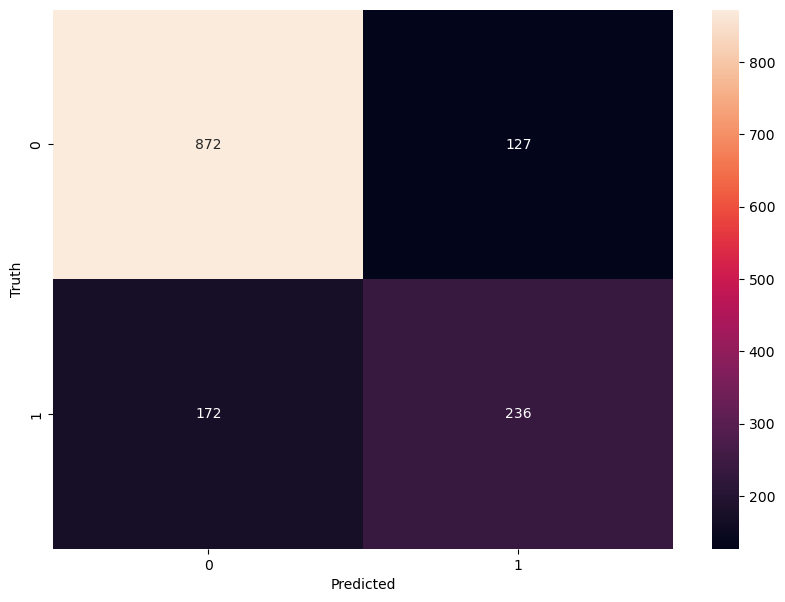

In [74]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')